In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
train_set = pd.read_csv("C:/Users/Jonathan/Downloads/south-african-language-identification-hack-2023/train_set.csv")
test_set = pd.read_csv("C:/Users/Jonathan/Downloads/south-african-language-identification-hack-2023/test_set.csv")

In [3]:
train_set.head()
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [4]:
train_set.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [5]:
print(train_set.columns)

Index(['lang_id', 'text'], dtype='object')


In [6]:
train_set.isnull().sum()

lang_id    0
text       0
dtype: int64

In [7]:
train_set['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

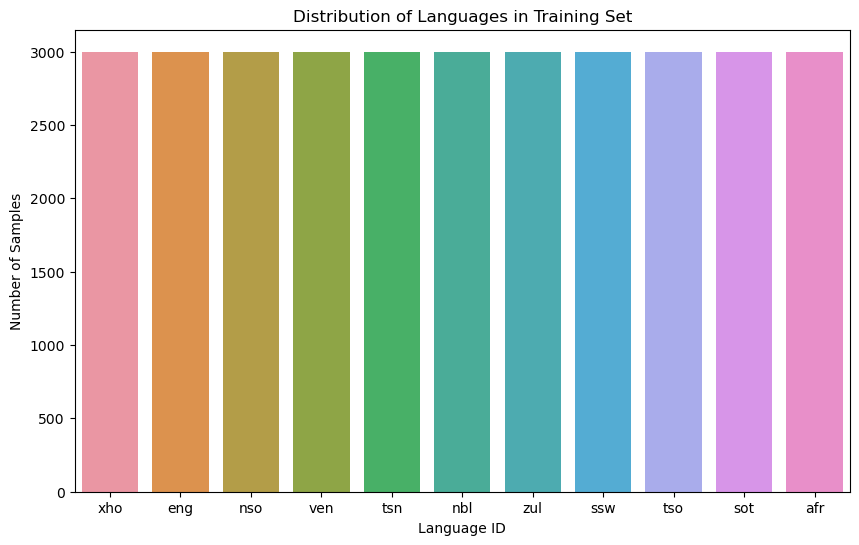

In [8]:
language_distribution = train_set['lang_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_distribution.index, y=language_distribution.values)
plt.title('Distribution of Languages in Training Set')
plt.xlabel('Language ID')
plt.ylabel('Number of Samples')
plt.show()

In [22]:
def preprocess_text(text):
    """
    Function to preprocess text data:
    - Lowercasing
    - Removing punctuation
    - Removing numbers
    - Tokenization
    - Removing stopwords
    - Lemmatization
    """
    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in tokens])

    return lemmatized_output


In [23]:
train_set['cleaned_text'] = train_set['text'].apply(preprocess_text)

train_set.head()

,lang_id,text,cleaned_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,province kwazulunatal department transport inv...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,netefatša gore ba file dilo ka moka tše le dum...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(train_set['cleaned_text'])

y = train_set['lang_id']

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      0.99      0.99       583
         eng       0.99      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      1.00      0.99       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       1.00      0.99      1.00      6600



In [30]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, X, y, cv=5)
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std

(0.9949393939393939, 0.00041327823324198773)

In [33]:

test_set['cleaned_text'] = test_set['text'].apply(preprocess_text)


In [34]:
test_set_features = tfidf.transform(test_set['cleaned_text'])


In [35]:
predictions = best_lr_model.predict(test_set_features)

In [38]:
submission = pd.DataFrame({
    'index': test_set['index'],  # Use the 'index' column as the identifier
    'lang_id': predictions  # Replace 'lang_id' with the actual prediction column name required by Kaggle
})

In [39]:
submission.to_csv('submission.csv', index=False)

In [40]:
submission.rename(columns={'index': 'id'}, inplace=True)